# Project Name : Customer Personality Analysis



#### Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer

In [ ]:
dataset = pd.read_csv("marketing_campaign.csv", sep='\t')

In [ ]:
dataset.head(2)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
dataset.shape

(2240, 29)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
dataset.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

### Data Analysis

In [ ]:
dataset.isnull().sum().any()

True

In [ ]:
dataset.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [ ]:
mean = dataset['Income'].mean()
dataset['Income'] = dataset['Income'].fillna(mean)

Creating a new column named Age by using year of birth

In [ ]:
dataset['Age'] = 2022 - dataset['Year_Birth']

In [ ]:
dataset['Age']

0       65
1       68
2       57
3       38
4       41
        ..
2235    55
2236    76
2237    41
2238    66
2239    68
Name: Age, Length: 2240, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


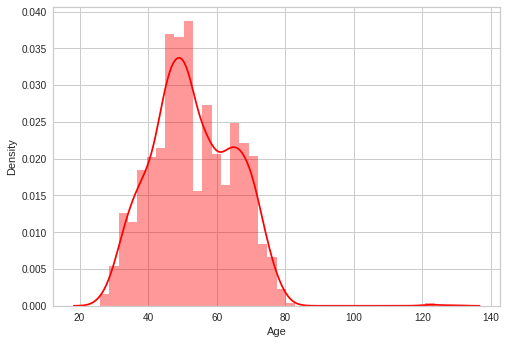

In [ ]:
sns.distplot(dataset['Age'], color ='red')

In [ ]:
dataset['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

([<matplotlib.patches.Wedge at 0x7f92d3e50890>,
 [Text(-0.010799092464652335, 1.099946989450828, 'Graduation'),
  Text(-0.840441051704004, -0.7096892549635142, 'PhD'),
  Text(0.3574766803682644, -1.0402934311976049, 'Master'),
  Text(0.9970110351959686, -0.4647246450291434, '2n Cycle'),
  Text(1.09684684539309, -0.08322858734369598, 'Basic')],
 [Text(-0.005890414071628546, 0.5999710851549971, '50.3%'),
  Text(-0.45842239183854755, -0.38710322998009866, '21.7%'),
  Text(0.1949872802008715, -0.567432780653239, '16.5%'),
  Text(0.5438242010159828, -0.2534861700158964, '9.1%'),
  Text(0.59828009748714, -0.04539741127837962, '2.4%')])

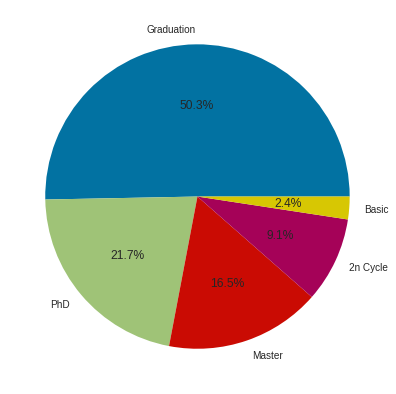

In [ ]:
plt.figure(figsize = (7,7))
ed = dataset['Education'].value_counts()
plt.pie(ed, autopct = '%.1f%%', labels = [ed.index[0], ed.index[1], ed.index[2], ed.index[3], ed.index[4]])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count Plot for marital status of people')

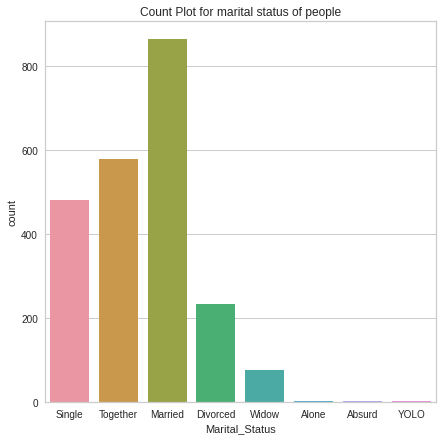

In [ ]:
plt.figure(figsize=(7,7))
ms = sns.countplot(dataset['Marital_Status'])
ms.set_xticklabels(ms.get_xticklabels())
plt.title("Count Plot for marital status of people")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


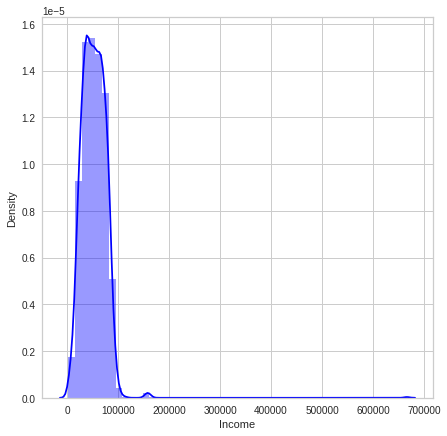

In [ ]:
plt.figure(figsize = (7,7))
sns.distplot(dataset['Income'], color = 'blue')

Text(0.5, 1.0, 'Kids available at home')

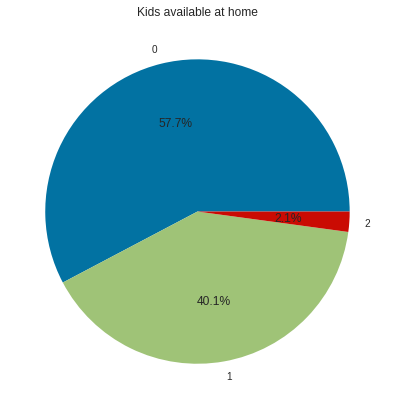

In [ ]:
plt.figure(figsize = (7,7))
kid = dataset['Kidhome'].value_counts()
plt.pie(kid,autopct = '%.1f%%', labels = [kid.index[0], kid.index[1], kid.index[2]])
plt.title("Kids available at home")

Text(0.5, 1.0, 'Teens available at home')

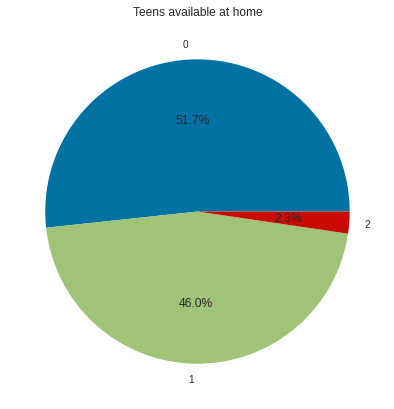

In [ ]:
plt.figure(figsize = (7,7))
teen = dataset['Teenhome'].value_counts()
plt.pie(teen,autopct = '%.1f%%', labels = [teen.index[0], teen.index[1], teen.index[2]])
plt.title("Teens available at home")

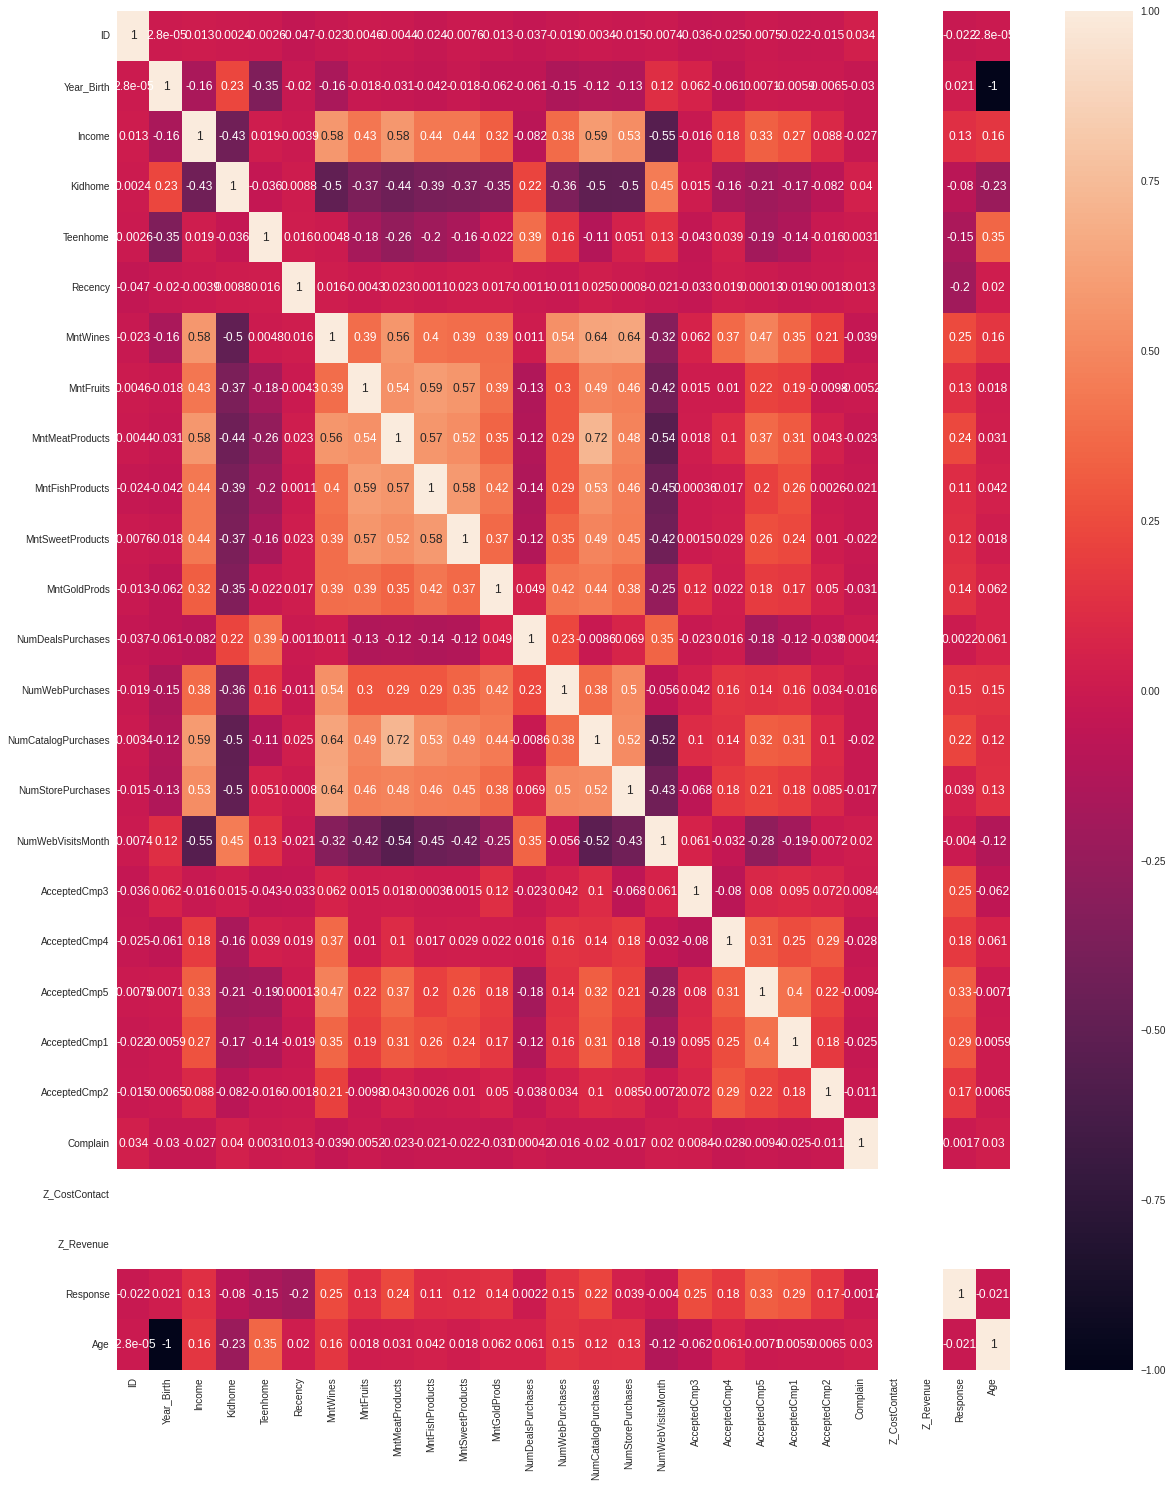

In [ ]:
plt.figure(figsize = (20, 25))
sns.heatmap(dataset.corr(), annot = True)

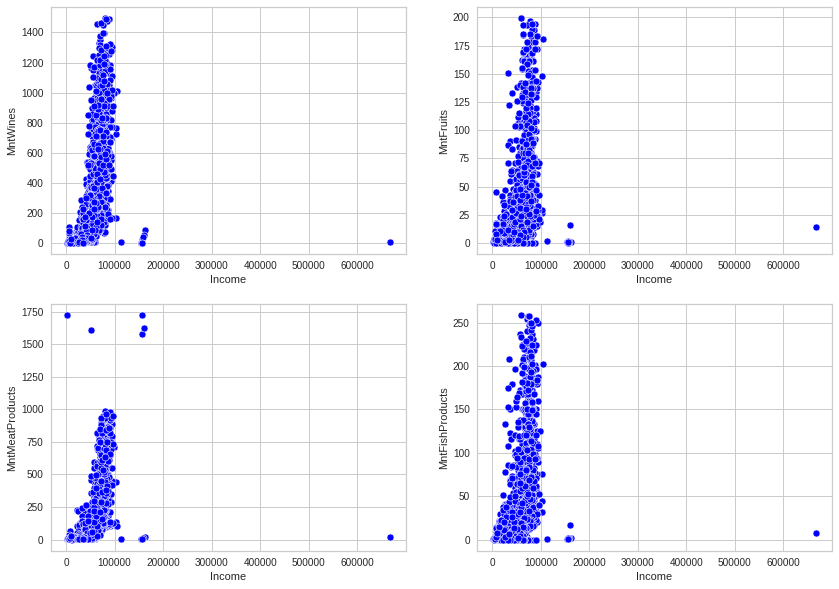

In [ ]:
plt.figure(figsize = (14, 10))
plt.subplot(2, 2, 1)
sns.scatterplot(data = dataset, x = 'Income', y = 'MntWines', color ='blue')
plt.subplot(2, 2, 2)
sns.scatterplot(data = dataset, x = 'Income', y ='MntFruits', color = 'blue')
plt.subplot(2, 2, 3)
sns.scatterplot(data = dataset, x = 'Income', y ='MntMeatProducts', color = 'blue')
plt.subplot(2, 2, 4)
sns.scatterplot(data = dataset, x = 'Income', y = 'MntFishProducts', color = 'blue')

<BarContainer object of 5 artists>

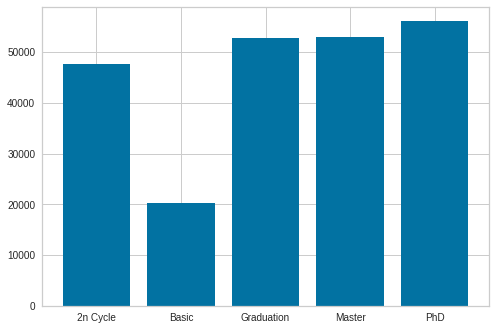

In [ ]:
education_income = dataset.groupby('Education')['Income'].mean()
plt.bar(education_income.index, height = round(education_income, 2))

## Data Cleaning and Feature Engineering

In [ ]:
mean

52247.25135379061

In [ ]:
# We have replaced the income null values with mean of income
dataset = dataset.dropna()  

In [ ]:
dataset.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
Age                    0
dtype: int64

Creating extra features like total money spent, family size

In [ ]:
dataset["Total_Spent"] = dataset["MntWines"] + dataset["MntFruits"] + dataset["MntMeatProducts"] + dataset["MntFishProducts"] + dataset["MntSweetProducts"] + dataset["MntGoldProds"]

In [ ]:
dataset["Relation"] = dataset["Marital_Status"].replace({"Married": 2, "Together": 2, "Absurd": 1, "Widow": 1, "YOLO": 1, "Divorced": 1, "Single": 1, "Alone": 1})
dataset["Children"] = dataset["Kidhome"] + dataset["Teenhome"]
dataset["Family_Size"] = dataset["Relation"] + dataset["Children"]

In [ ]:
dataset = dataset.drop(['Relation', 'Children'], axis = 1)

In [ ]:
dataset.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_Spent', 'Family_Size'],
      dtype='object')

Label Encoding categorical data i.e. Education data

In [ ]:
dataset['Education']

0       Graduation
1       Graduation
2       Graduation
3       Graduation
4              PhD
           ...    
2235    Graduation
2236           PhD
2237    Graduation
2238        Master
2239           PhD
Name: Education, Length: 2240, dtype: object

In [ ]:
lb = LabelEncoder()
dataset['Education'] = lb.fit_transform(dataset['Education'])

In [ ]:
dataset['Response']

0       1
1       0
2       0
3       0
4       0
       ..
2235    0
2236    0
2237    0
2238    0
2239    1
Name: Response, Length: 2240, dtype: int64

Scaling Data

In [ ]:
data = dataset.copy()
to_drop = ["AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "AcceptedCmp1","AcceptedCmp2", "Complain", "Response", ]
data = data.drop(to_drop, axis = 1)

In [ ]:
data.head(2)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue,Age,Total_Spent,Family_Size
0,5524,1957,2,Single,58138.0,0,0,04-09-2012,58,635,...,3,8,10,4,7,3,11,65,1617,1
1,2174,1954,2,Single,46344.0,1,1,08-03-2014,38,11,...,2,1,1,2,5,3,11,68,27,3


In [ ]:
scaler = StandardScaler()
# scaled_feature = scaler.fit_transform(df.values)
# scaled_df = pd.DataFrame(scaled_feature, index = df.index, columns = df.columns)

In [ ]:
dataset['Response']

0       1
1       0
2       0
3       0
4       0
       ..
2235    0
2236    0
2237    0
2238    0
2239    1
Name: Response, Length: 2240, dtype: int64

## Aproach 1: Unsupervised Learning

## Perform Clustering

We will use the Elbob method to find the optimum number of clusters

In [ ]:
dataset = dataset.drop(['Marital_Status', 'Dt_Customer'], axis = 1)

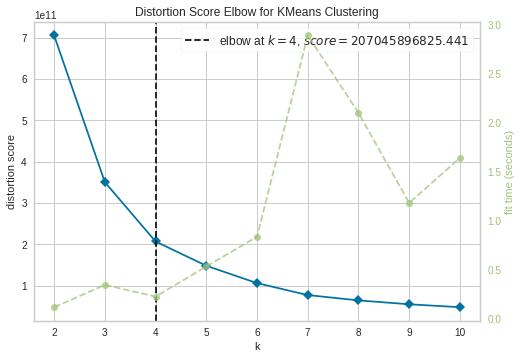

In [ ]:
em = KElbowVisualizer(KMeans(), k = 10)
em.fit(dataset)
em.show()

We see that the optimum number of clusters should be used k = 4

We will use K Means Clutering for the operation

In [ ]:
kmc = KMeans(n_clusters = 4)
pred = kmc.fit_predict(dataset)
dataset["Clusters"] = pred

In [ ]:
dataset['Clusters']

0       3
1       3
2       1
3       0
4       3
       ..
2235    3
2236    3
2237    3
2238    1
2239    3
Name: Clusters, Length: 2240, dtype: int32

Let us visualize our Clusters

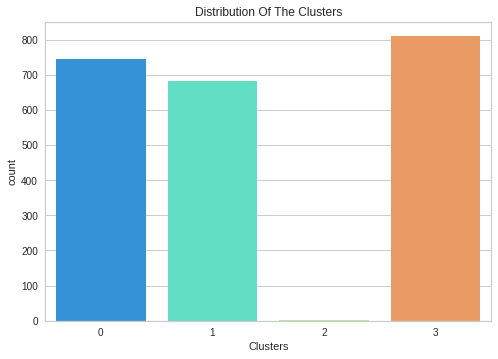

In [ ]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
fig = sns.countplot(x = dataset["Clusters"], palette = "rainbow")
fig.set_title("Distribution Of The Clusters")
plt.show()

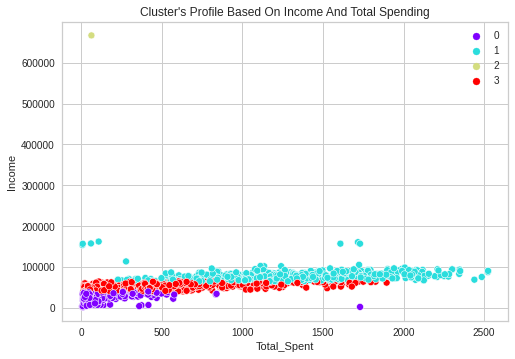

In [ ]:
fig = sns.scatterplot(data = dataset, x = dataset["Total_Spent"], y = dataset["Income"], hue =dataset["Clusters"], palette ="rainbow")
fig.set_title("Cluster's Profile Based On Income And Total Spending")
plt.legend()
plt.show()

## Approach 2 : Supervised Learning

In [ ]:
y = dataset['Response']
X = dataset.drop(['Response', 'Education'], axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (1792, 29)
Shape of y_train =  (1792,)
Shape of X_test =  (448, 29)
Shape of y_test =  (448,)


### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'gini')
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
classifier.score(X_test, y_test)

0.8660714285714286

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
classifier.score(X_test, y_test)

0.8191964285714286

### Random Forest 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
classifier.score(X_test, y_test)

0.875